## review data sample로 해본 wordcloud

In [46]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import platform
path = "c:/Windows/Fonts/malgun.ttf" 
from matplotlib import font_manager, rc 
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic') 
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

In [47]:
#!pip install wordcloud 설치가 안되어 있다면 실행해 주세요!

In [48]:
df = pd.read_csv("./naverplace_booking_review(1-2).csv"
                , encoding='utf-8'
                , index_col=0)
df.head()

,store_id_only_num,score,hairdresser,service,review,reviewer_id,visit_date
0,1571970153,5.0,임리원 실장,"컬러 예약금, 클리닉 예약금, 펌 예약금","뿌리염색,펌 진행했는데 부해보이지도않고 원하는 컬이 나와서 기분 좋습니다^^ 항상 ...",by_d,2020.05.13 방문
1,1571970153,5.0,이서현 실장,컬러 예약금,염색 컬러도 잘 골라주시고 커트도 예쁘게 해주셨어요🧡,angi,2020.05.13 방문
2,1571970153,5.0,한민지 디자이너,펌 예약금,손질법까지 꼼꼼하게 알려주시고 머리도 마음에 들어요 조만간 커트하러 올게요~,ralg,2020.05.13 방문
3,1571970153,5.0,임리원 실장,컬러 예약금,편안하게 머리 예쁘게 잘 하고 갑니다 ~ 중간중간 상담잘해줘서 좋았습니다:),hx_p,2020.05.13 방문
4,1571970153,4.5,김다빈 디자이너,컷 예약금,친절하고 머리도 이뿌게 잘됫어용 담엔 펌하러 오겟습니당 :),alsw,2020.05.13 방문


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13262 entries, 0 to 13261
Data columns (total 7 columns):
store_id_only_num    13262 non-null int64
score                13262 non-null float64
hairdresser          13262 non-null object
service              13262 non-null object
review               13262 non-null object
reviewer_id          13262 non-null object
visit_date           13262 non-null object
dtypes: float64(1), int64(1), object(5)
memory usage: 828.9+ KB


In [50]:
df.isnull().sum() #데이터의 nan이나 결측치는 없는걸로 확인

store_id_only_num    0
score                0
hairdresser          0
service              0
review               0
reviewer_id          0
visit_date           0
dtype: int64

### Mecab 간단 활용해 보기

In [51]:
import MeCab
m = MeCab.Tagger()
out = m.parse("mecab으로 연습하는 형태소 분석")
print(out)

mecab	SL,*,*,*,*,*,*,*
으로	JKB,*,F,으로,*,*,*,*
연습	NNG,행위,T,연습,*,*,*,*
하	XSV,*,F,하,*,*,*,*
는	ETM,*,T,는,*,*,*,*
형태소	NNG,*,F,형태소,Compound,*,*,형태/NNG/*+소/NNG/*
분석	NNG,행위,T,분석,*,*,*,*
EOS



In [52]:
from konlpy.tag import Mecab
mecab = Mecab()
print(mecab.nouns('명사만을 추출하여 단어를 나타내 봅니다'))

['명사', '추출', '단어']


### 리뷰 데이터 샘플로 mecab 활용해 보기

In [53]:
from konlpy.tag import Mecab
tagger = Mecab()
tokens = []
words = df['review']
for word in words:
    tokens += tagger.nouns(word)

print(tokens) #명사형태만 tokens 에 저장

['뿌리', '염색', '펌', '진행', '부', '원', '컬', '기분', '친절', '실장', '스텝', '덕', '머리', '힐링', '가요', '염색', '컬러', '커트', '손질', '법', '머리', '마음', '커트', '편안', '머리', '중간', '중간', '상담', '친절', '머리', '담', '펌', '방문', '때', '머리', '컬러', '맘', '컷', '트', '다음', '방문', '게', '친절', '설명', '머리', '커트', '동안', '편안', '보람', '머리', '상태', '펌', '게', '걱정', '컬', '자연', '건강', '머리', '머리', '텐데', '머리', '컬', '머리', '것', '만족', '기분', '스타일', '감사', '클리닉', '커트', '스타일링', '감사', '감사', '코로나', '건강', '유의', '친절', '완전', '맘', '감사', '합', '이전', '중단발', '제안', '용기', '내', '주변', '말', '기장', '거', '제안', '칼', '우주', '쌤', '제안', '답', '마음', '하트', '담', '밝은색', '필요', '계절', '염색', '클리닉', '커트', '컬러', '진행', '클리닉', '컬러', '맘', '톤', '얼룩', '커트', '기장', '얼굴', '맘', '방문', '때', '만족', '합', '당', '머리', '정리', '건데', '정리', '감사', '합', '스타일', '다음', '닷', '못정', '추천', '만족', '친절', '드라이', '법', '친절', '방문', '이번', '엘리자벳', '펌', '만족', '친절', '립', '밤', '오늘', '머리', '김', '사', '친절', '머리', '감사', '펌', '시술', '고생', '기분', '전환', '감사', '커트', '커트', '전', '아로마', '두피', '진단', '만족', '커트', '만족', '번', '방문', '오늘', '감사', '머리

In [54]:
from collections import Counter #counter= 단어를 카운팅 해주는 패키지
count = Counter(tokens)
words = dict(count.most_common())
print(words) #단어와 함께 빈도수가 나오는 dict 출력

{'감사': 5904, '머리': 5767, '친절': 4237, '만족': 3654, '펌': 2528, '컷': 1769, '스타일': 1763, '방문': 1740, '맘': 1736, '커트': 1632, '다음': 1460, '마음': 1404, '원': 1376, '오늘': 1130, '염색': 1064, '트': 930, '때': 899, '실장': 896, '상담': 825, '쌤': 779, '번': 756, '선생': 739, '제': 709, '설명': 691, '기분': 666, '것': 653, '디자이너': 619, '손질': 595, '거': 568, '단발': 536, '신경': 524, '처음': 498, '서비스': 470, '시술': 465, '추천': 462, '스타일링': 448, '관리': 436, '당': 421, '드라이': 415, '방법': 413, '최고': 402, '담': 393, '법': 386, '뿌리': 379, '컬러': 368, '합': 365, '상태': 357, '스텝': 352, '시간': 347, '게': 341, '수': 330, '세심': 327, '달': 326, '오랜만': 326, '파마': 314, '클리닉': 311, '분': 311, '차홍': 301, '진행': 300, '고민': 294, '대로': 294, '이번': 286, '저': 284, '컬': 282, '헤어': 273, '예약': 256, '디자인': 251, '케어': 239, '룸': 232, '스탭': 219, '후': 214, '앞머리': 212, '색': 205, '얼굴': 201, '직원': 199, '완전': 194, '생각': 189, '걱정': 188, '가요': 183, '데': 181, '편안': 179, '샴푸': 177, '모발': 172, '뒤': 164, '부원장': 164, '말': 160, '전': 159, '중': 159, '말씀': 158, '앞': 157, '미용실': 155, 

In [55]:
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
matplotlib.rc('font',family = 'Malgun Gothic')
set_matplotlib_formats('retina') # 그래프가 한글일 경우 선명하게 나오지 않아 선명하게 하기
from wordcloud import WordCloud, STOPWORDS

<class 'numpy.ndarray'>
(1000, 1500, 3)


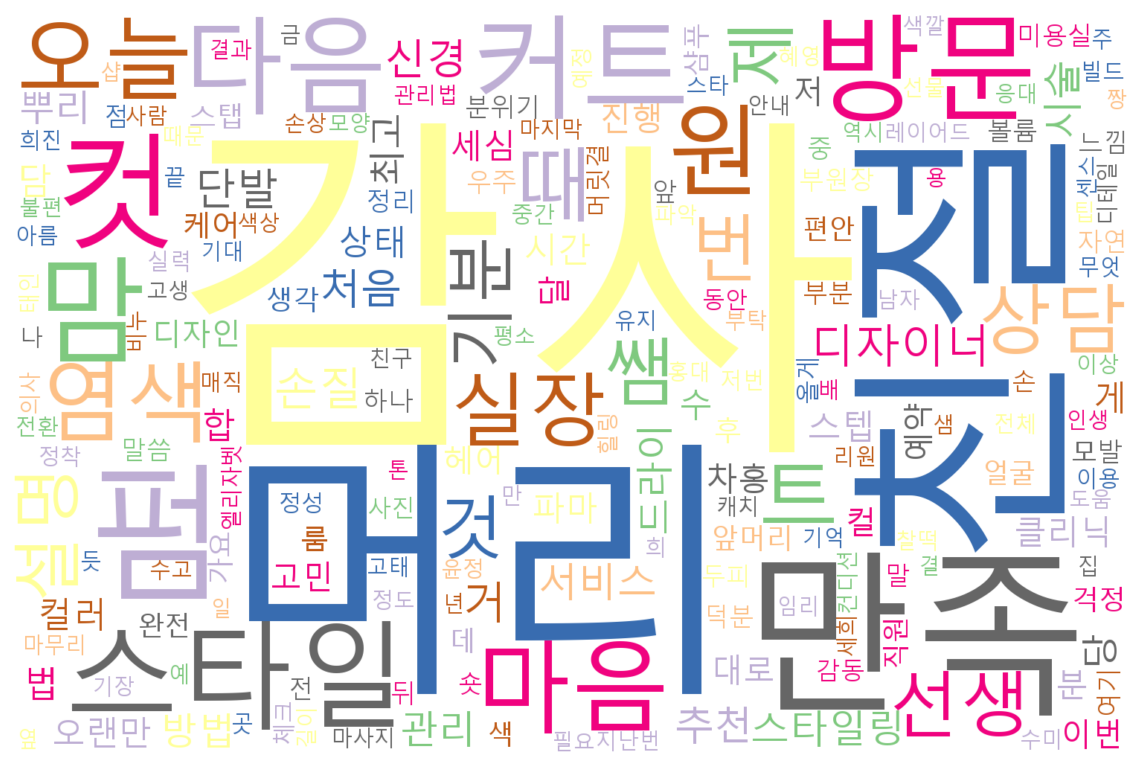

In [56]:
stopwords =set(STOPWORDS)
stopwords.add('ㅁ') 
wordcloud = WordCloud(
    #wordcloud가 한글 폰트 지원하지 않아서 오류 발생할수 있습니다.
    #아래는 윈도우 기준 default 폰트 저장 경로입니다.
    font_path = 'C:/Windows/Fonts/malgun.ttf' 
    , background_color='white' #배경 색깔
    ,colormap = "Accent_r" #폰트 색깔
    ,width=1500, height=1000).generate_from_frequencies(words) #count 값이 높은 순 대로 wordcloud 출력

array = wordcloud.to_array()
print(type(array)) # numpy.ndarray
print(array.shape) # shape 확인하기

fig = plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear') #2차원 선형보간 적용.
plt.axis("off")
plt.show()

fig.savefig('wordcloud_test.png') #출력된 이미지 파일 저장

 - 결론: 리뷰 샘플 데이터로 확인해 본 결과, 긍정평가의 단어(ex)'감사': 5904 회,  '친절': 4237 회, '만족': 3654 회 등)가 가장 많이 보이며 이를 시각화를 통해 직관적으로 확인해 보았음. 
 #### => review data 로 추천 모델 만들때, 긍정 review 보다 부정적(+객관적 평가) 리뷰에 주목해야 함.  